In [74]:
"""
2025-11-17 Maria Yli-Heikkilä
Plot the results to see how the adjustement works.


"""


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import faostat


# Results in:
fp = '/Users/myliheik/Documents/myPython/FBSadjusted/results/Food-supply-quantity-kg-capita-yr--2023.csv'
df = pd.read_csv(fp)

# How many cases we have:
uniqueCases = df[['Area', 'Item Code', 'Domain']].drop_duplicates()
uniqueCases['Domain'].value_counts()

Domain
BiasCorrectedAdjusted    20374
Old FBS                  19815
New FBS                  19815
Name: count, dtype: int64

In [75]:
# List/dictionary of items
myItemsDict = faostat.get_par('FBS', 'item')
#myItemsKeys = list(myItemsDict.keys())

In [76]:
# Is there any with only one domain?
tmp = uniqueCases.groupby(['Area', 'Item Code']).size().reset_index()
len(tmp[tmp[0] == 1]) # Good! There should not be.

0

In [77]:
# How about 2? There should not be:
checkThese = tmp[tmp[0] == 2]
checkThese # Check these later

,Area,Item Code,0
9477,Land Locked Developing Countries,2511,2
9478,Land Locked Developing Countries,2513,2
9479,Land Locked Developing Countries,2514,2
9480,Land Locked Developing Countries,2515,2
9481,Land Locked Developing Countries,2516,2
...,...,...,...
16689,Small Island Developing States (SIDS),2946,2
16690,Small Island Developing States (SIDS),2948,2
16691,Small Island Developing States (SIDS),2949,2
16692,Small Island Developing States (SIDS),2960,2


In [16]:
# Most of the cases should have three domains?
tmp = uniqueCases.groupby(['Area', 'Item Code']).size().reset_index()
len(tmp[tmp[0] == 3]) 

19256

In [33]:


#### FUNC:

def plotting7(data, mycountry, myElement, myItemCode, startingYear, axes):

    # Subset data:
    data22 = data[(data['Area'] == mycountry) & (data['Element'] == myElement) & (data['Item Code'] == myItemCode)]
    #exclude BiasCorrectedAdjusted:
    data2 = data22[~(data22['Domain'] == 'BiasCorrectedAdjusted')]
    
    if data2.empty:
        print(f'Empty dataset for {mycountry}, {myItemCode}')
    
    data2 = data2.assign(Time = pd.to_datetime(data2.Year, format='%Y'))
        
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2
        
        
    if data['Unit'][0] == '1000 No':
        unit = '$\\times 10^{3}$'
    else:
        unit = data['Unit'][0]
    #print(data2)
    #print(data3['Item'].values)
    #print(data3['Item'])
    myItem = data3['Item'].values[0]
        
    ax = sns.lineplot(data3, y = 'Value', x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    ax.set_ylabel(f'{myItem} ({unit})')
    
    #ax.text(pd.to_datetime('1990', format='%Y'), data3[myItem].max(), f'Correction: {data3['MeanDiffBias'].max()} ({data3['MeanDiffBiasPerc'].max()}%)')
    

def plotting8(data, mycountry, myElement, myItemCode, startingYear, axes):

    # Subset data:
    data2 = data[(data['Area'] == mycountry) & (data['Element'] == myElement) & (data['Item Code'] == myItemCode)]
    data2 = data2.assign(Time = pd.to_datetime(data2.Year, format='%Y'))
    #print(data2)
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2

    myItem = data3['Item'].values[0]

    #print(data3)  
    if data['Unit'][0] == '1000 No':
        unit = '$\\times 10^{3}$'
    else:
        unit = data['Unit'][0]
    #print(data3['Item'].values[0])    
    ax = sns.lineplot(data3, y = 'Value', x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    ax.set_ylabel(f'{myItem} ({unit})')
    
    ax.text(pd.to_datetime('1990', format='%Y'), data3['Value'].max(), f'Correction: {data3['MeanDiffBias'].max()} ({data3['MeanDiffBiasPerc'].max()}%)')
      

<function matplotlib.pyplot.show(close=None, block=None)>

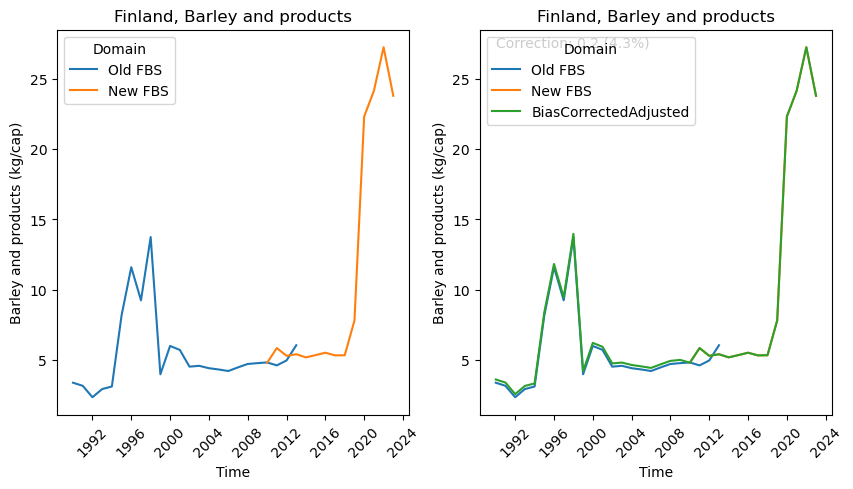

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

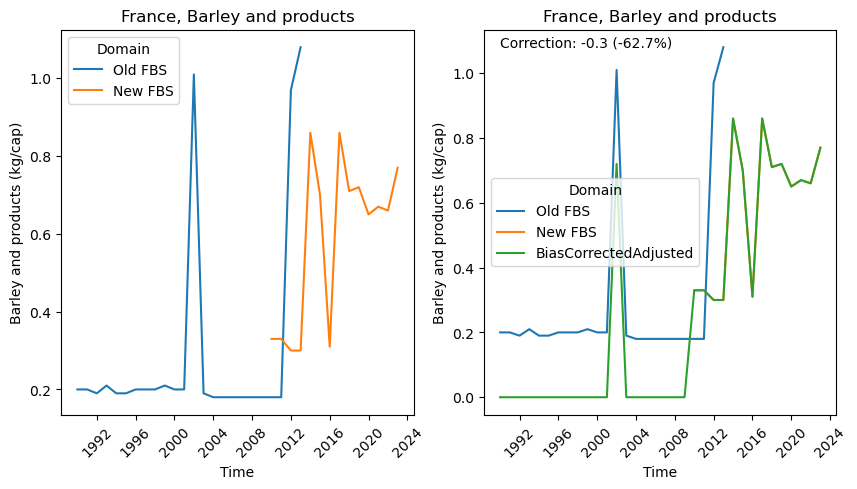

In [8]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'France'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

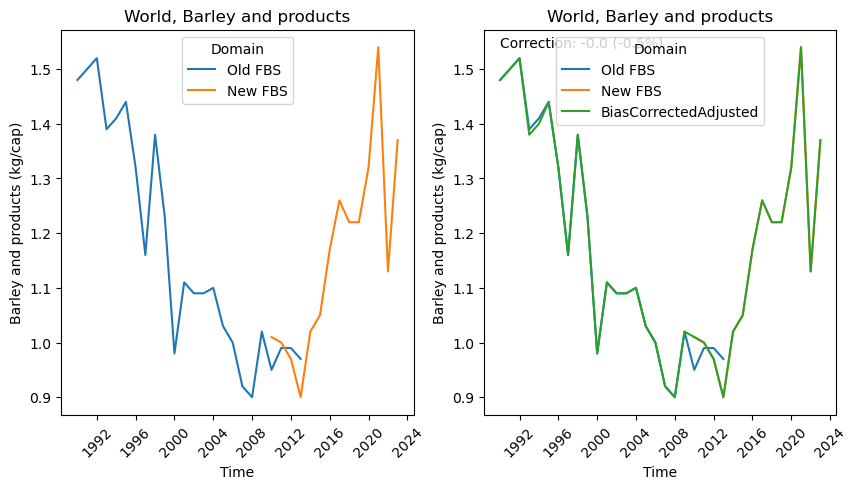

In [9]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'World'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

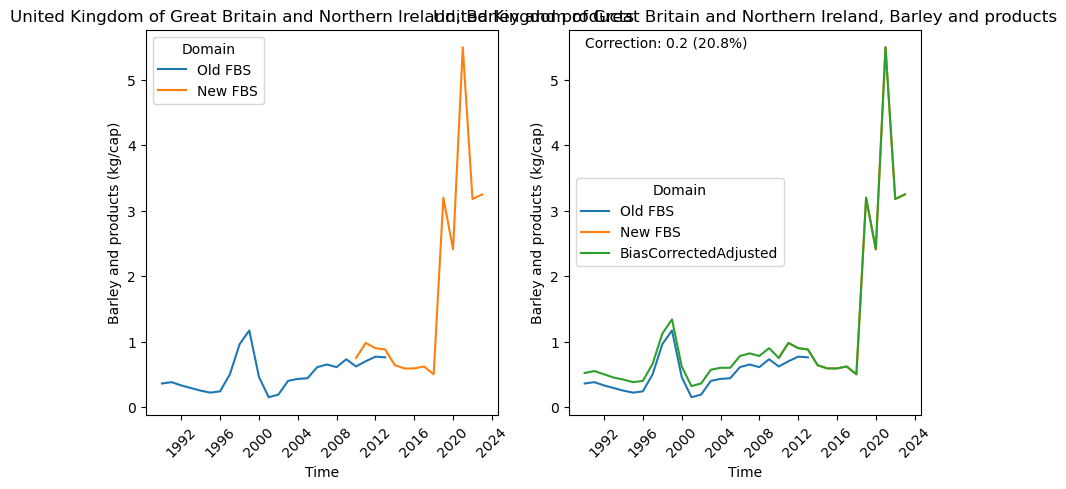

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'United Kingdom of Great Britain and Northern Ireland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

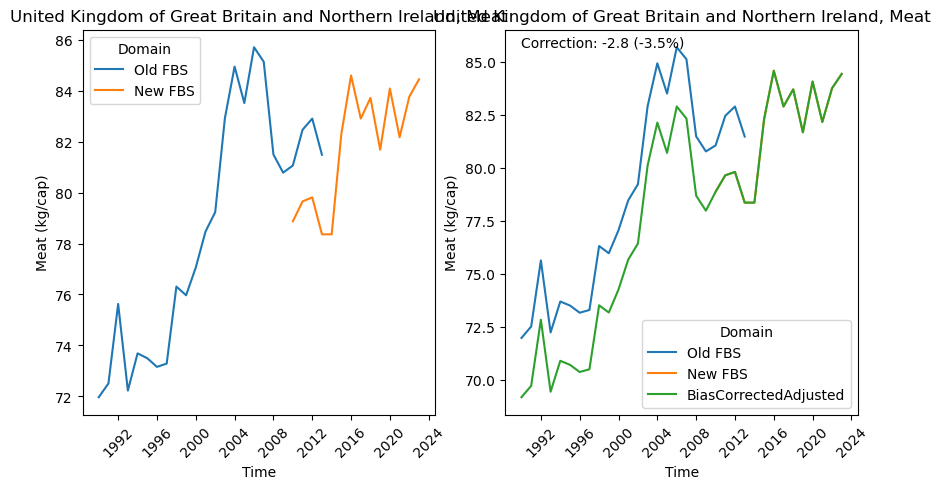

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'United Kingdom of Great Britain and Northern Ireland'
myItemCode = 2943
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2511


<function matplotlib.pyplot.show(close=None, block=None)>

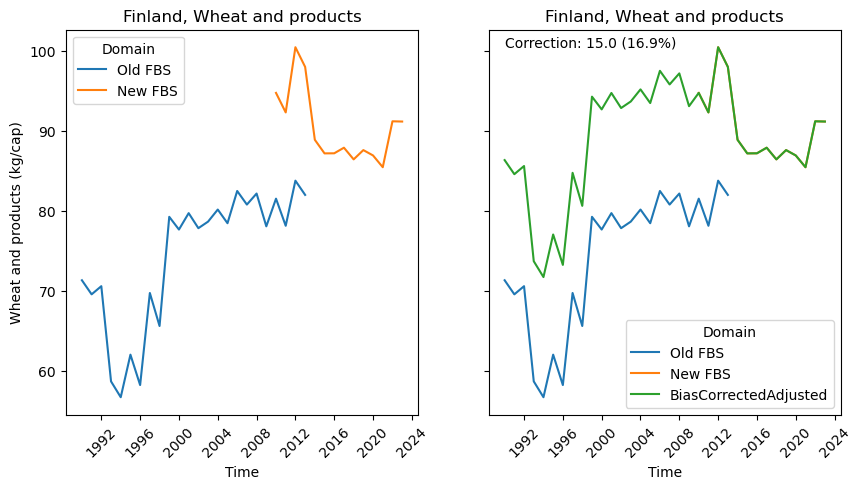

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = int(myItemsDict.get('Wheat and products'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2745


<function matplotlib.pyplot.show(close=None, block=None)>

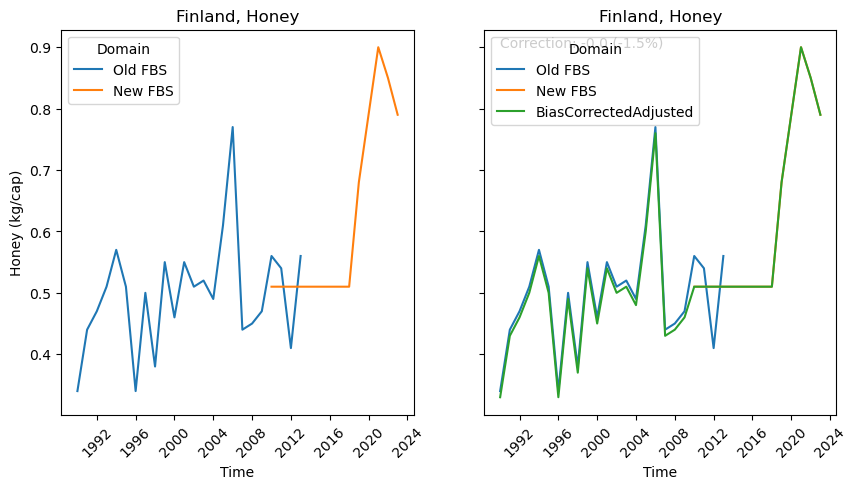

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = int(myItemsDict.get('Honey'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2731


<function matplotlib.pyplot.show(close=None, block=None)>

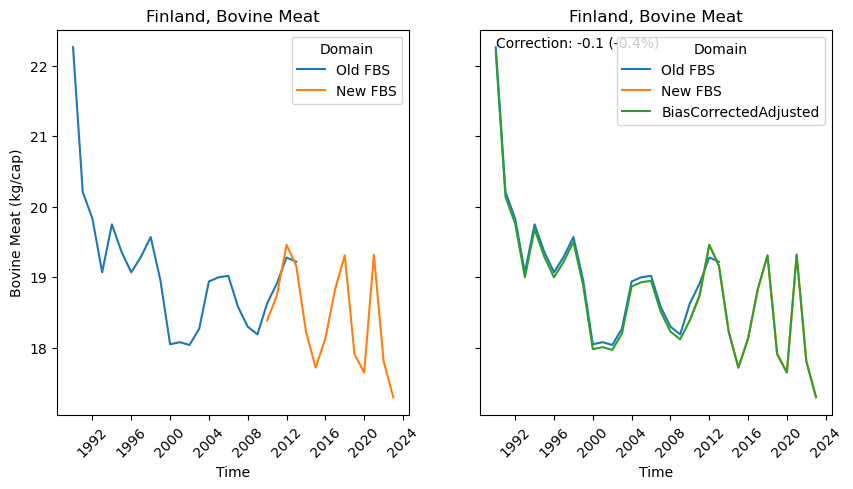

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = int(myItemsDict.get('Bovine Meat'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2546


<function matplotlib.pyplot.show(close=None, block=None)>

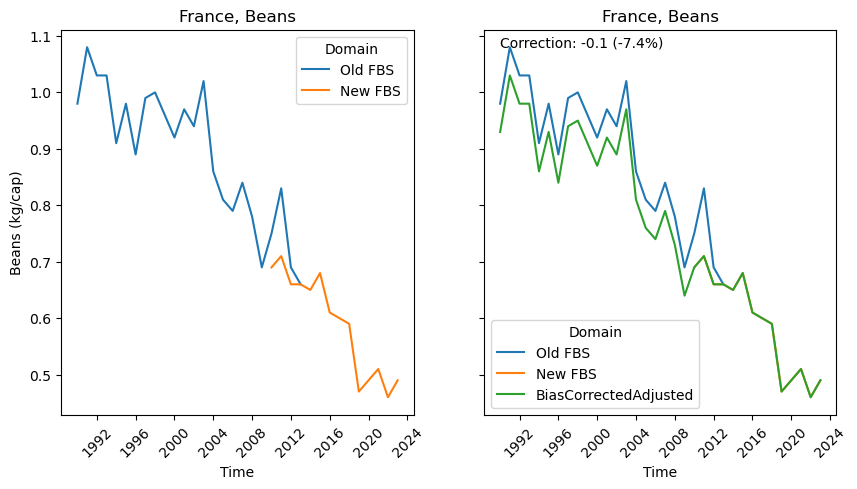

In [62]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'France'
myItemCode = int(myItemsDict.get('Beans'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2744


<function matplotlib.pyplot.show(close=None, block=None)>

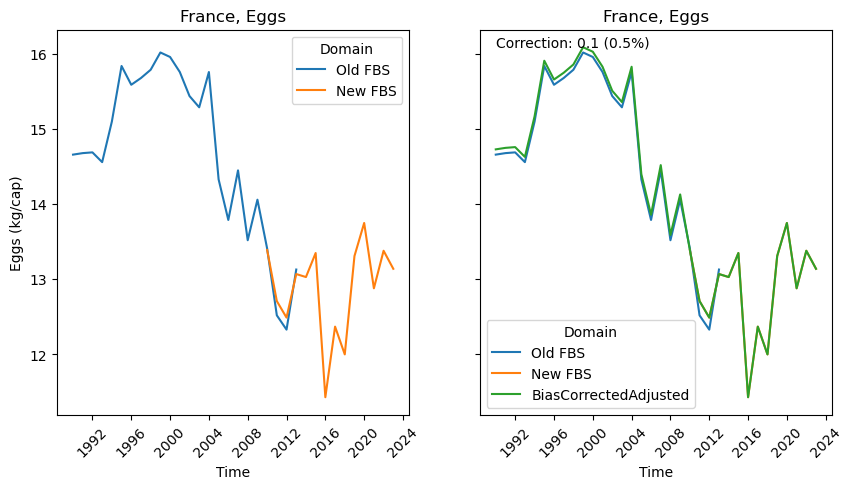

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'France'
myItemCode = int(myItemsDict.get('Eggs'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2744


<function matplotlib.pyplot.show(close=None, block=None)>

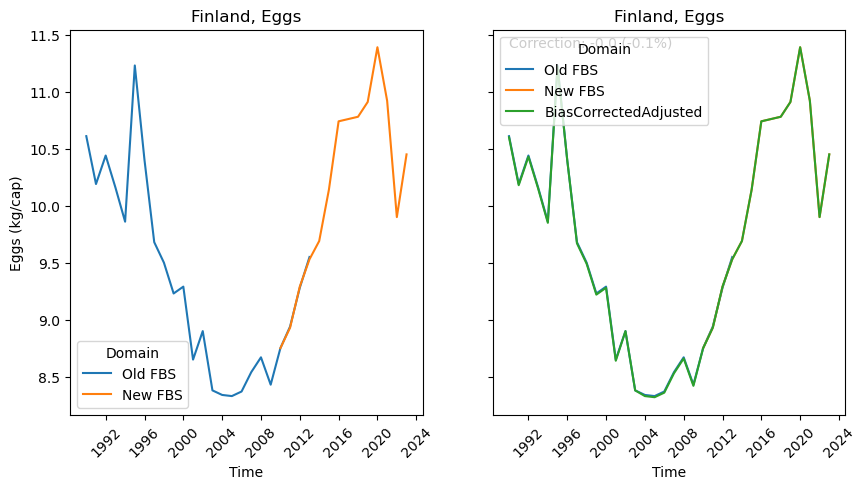

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = int(myItemsDict.get('Eggs'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2501


<function matplotlib.pyplot.show(close=None, block=None)>

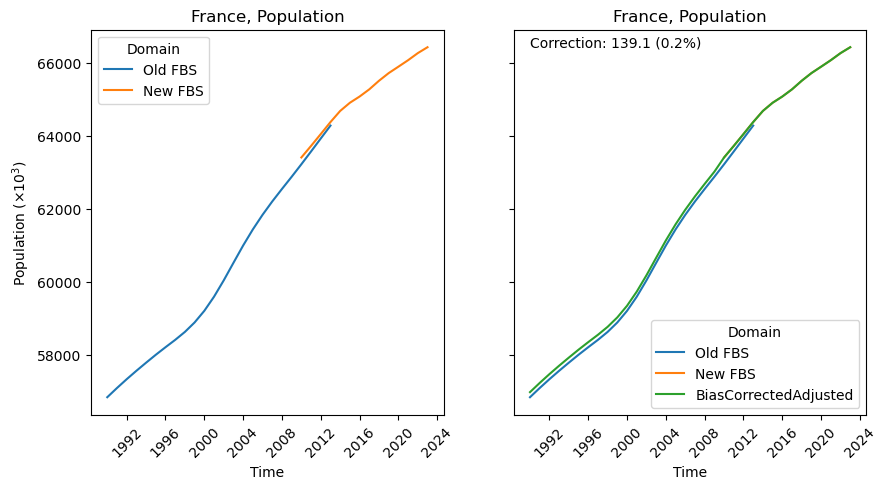

In [66]:
df = pd.read_csv('/Users/myliheik/Documents/myPython/FBSadjusted/results/Total-Population-Both-sexes-2023.csv')

myElement = 'Total Population - Both sexes'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'France'
myItemCode = int(myItemsDict.get('Population'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2501


<function matplotlib.pyplot.show(close=None, block=None)>

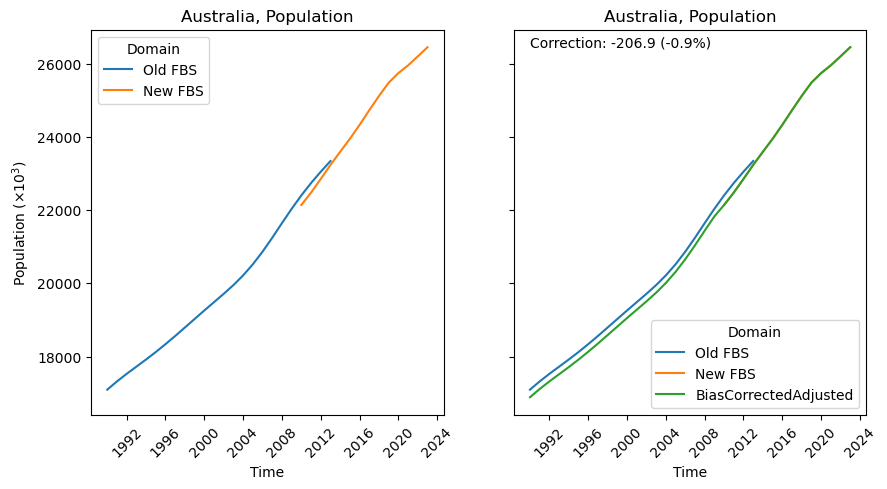

In [67]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Australia'
myItemCode = int(myItemsDict.get('Population'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

# Let's check those with only 2 domains:

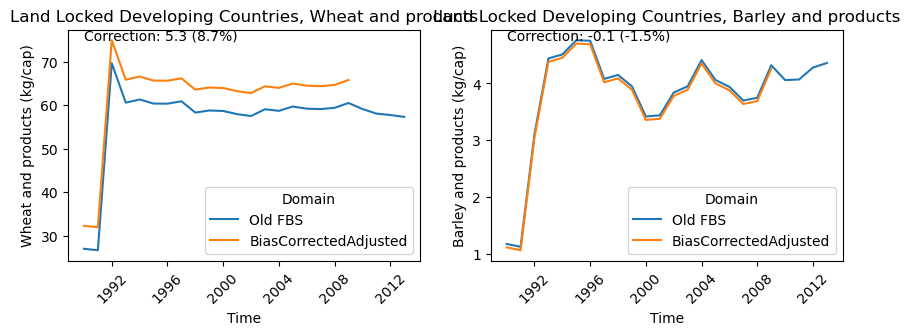

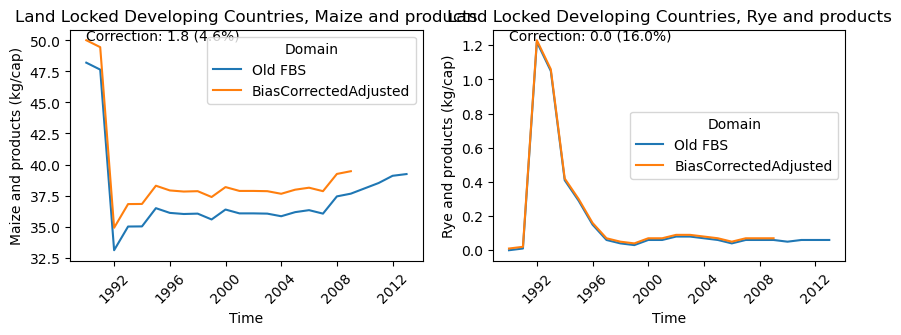

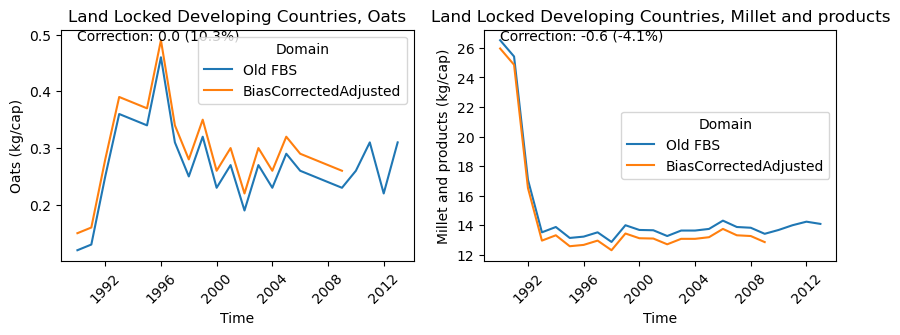

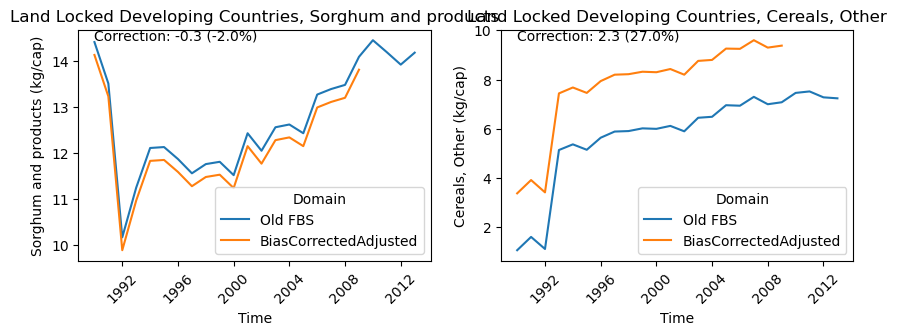

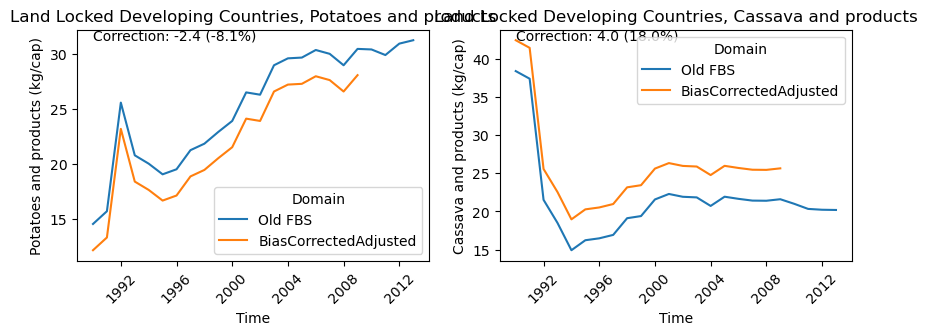

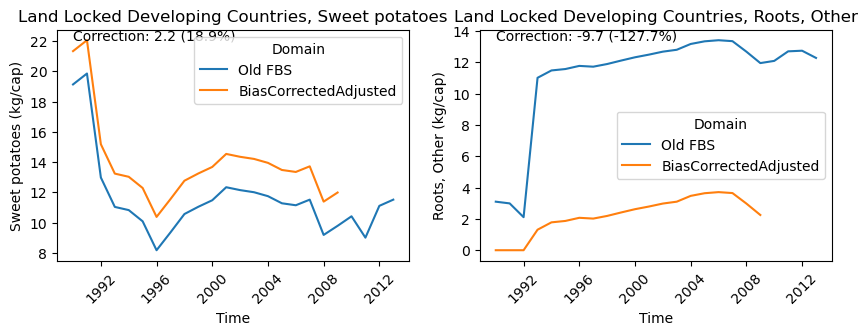

In [69]:
# Results in:
fp = '/Users/myliheik/Documents/myPython/FBSadjusted/results/Food-supply-quantity-kg-capita-yr-2023.csv'
df = pd.read_csv(fp)



for i in range(0, len(checkThese), 2):
    if i == 12:
        break
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

        mycountry = checkThese.iloc[i]['Area']
        myItemCode = checkThese.iloc[i]['Item Code']
        myElement = 'Food supply quantity (kg/capita/yr)'
        #print(myItemCode, mycountry)
        plotting8(df, mycountry, myElement, myItemCode, 1990, ax1)
        #break
        mycountry = checkThese.iloc[i+1]['Area']
        myItemCode = checkThese.iloc[i+1]['Item Code']

        plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)

        #plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
        plt.show




In [81]:
# where is new data?
for i in range(0, len(checkThese), 2):
    if i == 2:
        break
    else:
        mycountry = checkThese.iloc[i]['Area']
        myItemCode = checkThese.iloc[i]['Item Code']
        myElement = 'Food supply quantity (kg/capita/yr)'
        datatmp = df[(df['Area'] == mycountry) & (df['Element'] == myElement) & (df['Item Code'] == myItemCode)]


In [83]:
if datatmp[datatmp['Domain'] == 'New FBS'].empty:
    print('yes')

yes


In [87]:
(fp + '.csv').replace('--', '-')

'/Users/myliheik/Documents/myPython/FBSadjusted/results/Food-supply-quantity-kg-capita-yr-2023.csv.csv'

In [48]:
data[data['Item'] == 'Meat'][['Item', 'Item Code']].head()

,Item,Item Code
6968,Meat,2943
6969,Meat,2943
6970,Meat,2943
6971,Meat,2943
6972,Meat,2943


In [50]:
data

,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Domain,Note,MeanDiffBias,MeanDiffBiasPerc
0,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1961,1961,kg/cap,309.04,E,Old FBS,NaN,NaN,NaN
1,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1962,1962,kg/cap,300.20,E,Old FBS,NaN,NaN,NaN
2,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1963,1963,kg/cap,269.18,E,Old FBS,NaN,NaN,NaN
3,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1964,1964,kg/cap,297.75,E,Old FBS,NaN,NaN,NaN
4,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1965,1965,kg/cap,296.40,E,Old FBS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480973,5817,'902,Net Food Importing Developing Countries,2680,'S2680,Infant food,645,Food supply quantity (kg/capita/yr),2009,2009,kg/cap,0.07,E,BiasCorrectedAdjusted,NaN,-0.0,-0.0
2480974,5817,'902,Net Food Importing Developing Countries,2680,'S2680,Infant food,645,Food supply quantity (kg/capita/yr),2010,2010,kg/cap,0.07,E,BiasCorrectedAdjusted,NaN,-0.0,-0.0
2480975,5817,'902,Net Food Importing Developing Countries,2680,'S2680,Infant food,645,Food supply quantity (kg/capita/yr),2011,2011,kg/cap,0.10,E,BiasCorrectedAdjusted,NaN,-0.0,-0.0
2480976,5817,'902,Net Food Importing Developing Countries,2680,'S2680,Infant food,645,Food supply quantity (kg/capita/yr),2012,2012,kg/cap,0.10,E,BiasCorrectedAdjusted,NaN,-0.0,-0.0
